# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [22]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [24]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [52]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_hu = (
    sfo_data
    .groupby(sfo_data.index)
    .mean()
)

In [53]:
# Save the dataframe as a csv file
sfo_data_hu.to_csv('sfo_data_hu.csv')

<AxesSubplot:>

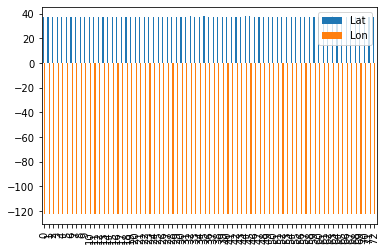

In [54]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data_hu.plot.bar()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [29]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

<AxesSubplot:xlabel='gross_rent'>

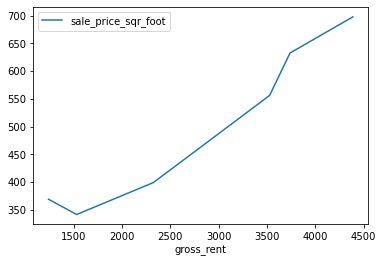

In [30]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sfo_data_l1 = (
    sfo_data[["gross_rent", "sale_price_sqr_foot"]]
    .groupby(sfo_data.index)
    .mean()
)

sfo_data_l1
# Line chart for average montly rent
sfo_data_l1.plot.line("gross_rent")

<AxesSubplot:xlabel='sale_price_sqr_foot'>

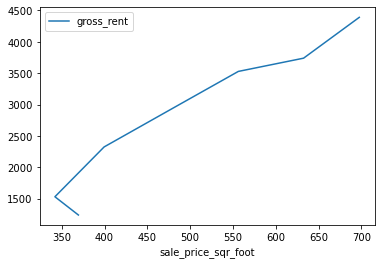

In [31]:
sfo_data_l1.plot.line("sale_price_sqr_foot")


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [32]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_l1 = (
    sfo_data[["gross_rent", "sale_price_sqr_foot"]]
    .groupby(sfo_data.index)
    .mean()
)


In [33]:
 sfo_data.groupby(sfo_data.index).mean()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [34]:
 sfo_data[["gross_rent", "sale_price_sqr_foot"]]

,gross_rent,sale_price_sqr_foot
year,,
2010,1239,291.182945
2010,1239,267.932583
2010,1239,170.098665
2010,1239,347.394919
2010,1239,319.027623
...,...,...
2016,4390,903.049771
2016,4390,970.085470
2016,4390,552.602567


In [36]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_data_l1.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
avg_data_rent = sfo_data['Total Average Loan Amount']
rent_avg_grp = loan_data_state.sort_values()
rent_avg_grp.index.names = ['State Code 0']

# Plot Total Average Loan Amount
plot_state_avgs = loan_data_avg_grp.hvplot.bar(label='2019 Total Average Amount')
plot_state_avgs

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [13]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [37]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [38]:
# Plotting the data from the top 10 expensive neighborhoods
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [40]:
# Load neighborhoods coordinates data
load_dotenv()
map_box_api = os.getenv("mapbox")

In [42]:
file_path = Path("neighborhoods_coordinates.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [43]:
# Calculate the mean values for each neighborhood
sfo_data.mean()

Lat     37.760194
Lon   -122.439124
dtype: float64

In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [46]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

In [47]:
# Create a scatter mapbox to analyze neighborhood info
map_box_api

'pk.eyJ1IjoidGhlanBzb3VyY2UiLCJhIjoiY2txeHgxbjJuMTJvcDJybGZtdncxeHlnMyJ9.2Iav7St98iwKW4PxsmAN0g'

In [49]:
places_of_interest = pd.read_csv(
    Path("Data/sfo_neighborhoods_census_data.csv")
).dropna()
places_of_interest.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [55]:
# Fetch the data from all expensive neighborhoods per year.


df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

NameError: name 'df_costs' is not defined

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


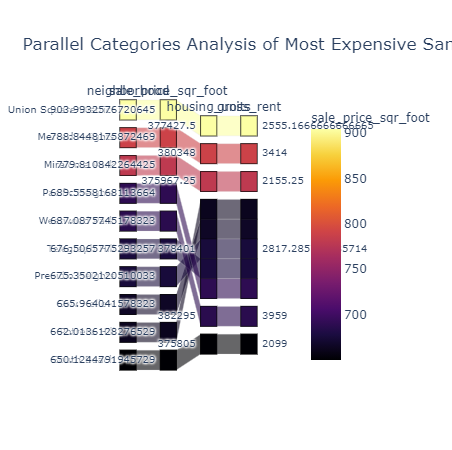

In [21]:
# Parallel Categories Plot
row_of_parallel = pn.Row(parallel_categories, parallel_coordinates)

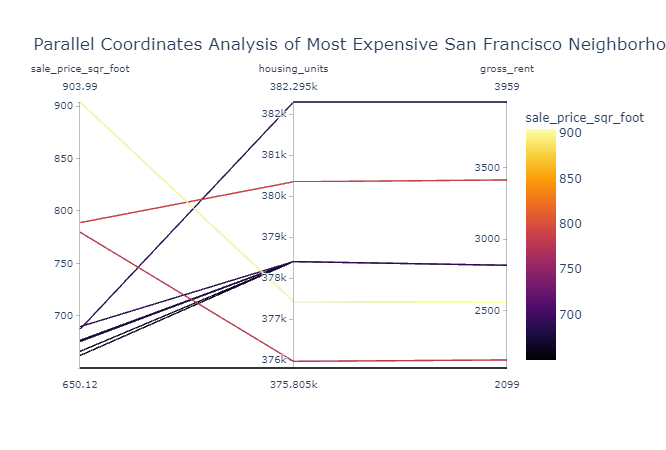

In [22]:
# Parallel Coordinates Plot
parallel_coordinates = px.parallel_coordinates(df_expensive_neighborhoods_per_year)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [56]:
# Sunburst Plot
df = px.data()
fig = px.sunburst()
fig.show()

TypeError: 'module' object is not callable